**Import Tensorflow as Neural Network package**

In [11]:
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
Data = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50CombLagged/50CombLagged.csv")
Target = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50CombLagged/TargetOutliersTreated.csv")

In [13]:
Target.head()

#Data.drop(columns = ['Datum'], inplace = True)
Data.head()


,pm10_stundenmittelwerte_ug_m3,pm2_5_stundenmittelwerte_ug_m3,PM10 [ug/m3],PM2.5 [ug/m3],NO2 [ug/m3],NOX [ug/m3 eq. NO2],no2_stundenmittelwerte_ug_m3,CPC [1/cm3],Basel Wind Direction [10 m],Basel Wind Speed [10 m],...,Basel Wind Speed [10 m]_x_Hour,Basel Wind Direction [10 m]_x_Basel Wind Direction [10 m],Basel Wind Direction [10 m]_x_Hour,406v_sumLW_x_408n_sumLief,660n_sumPW_x_Gasverbrauch,Gasverbrauch_x_Gasverbrauch,Gasverbrauch_x_Hour,PM10_1h_lag,PM10_2h_lag,PM10_24h_lag
0,0.371266,0.764582,0.584737,1.069597,1.257089,1.099745,-0.244192,0.510222,-0.072930,-0.274121,...,-0.066647,-0.899970,-0.024535,0.180220,-0.797192,-0.524060,0.077300,0.096166,0.010001,5.637085
1,0.277764,0.702844,0.312302,0.826050,1.084973,0.836950,-0.300376,0.216428,-0.072930,-0.274121,...,-0.086139,-0.899970,-0.028848,-0.007550,-0.836568,-0.461916,0.127767,0.017932,0.096179,3.190429
2,0.142528,0.570258,0.244194,0.754418,0.985327,0.774379,-0.321300,0.090215,-0.182476,-0.092406,...,-0.064343,-0.877057,-0.056393,0.257705,-0.803201,-0.190723,0.238667,-0.185601,0.017946,1.511672
3,0.000139,0.468813,0.187437,0.725766,0.930975,0.993376,-0.364429,0.447317,-0.243955,0.085004,...,-0.016326,-0.854702,-0.085834,0.155832,-0.419150,0.571487,0.465321,-0.296032,-0.185588,-0.690209
4,-0.060573,0.395517,0.153382,0.697113,0.822270,1.093488,-0.289886,0.316550,-0.325020,0.157442,...,0.018813,-0.814787,-0.130890,-0.007550,-0.418985,1.439691,0.732485,-0.490289,-0.296019,-1.257621


In [14]:
n = Data.shape[0]
X = Data.copy()
y = Target["PM10_Combined_Trend_Residual"].copy()

# Split-Größen definieren
train_size = int(n * 0.7)  # 70% Training
val_size = int(n * 0.2)    # 20% Validierung
test_size = n - train_size - val_size  # 10% Test

# Training (älteste Daten)
X_train, y_train = X[:train_size], y[:train_size]

# Validierung (neuere Daten)
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]

# Test (neueste Daten)
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]


In [15]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [17]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])


Epoch 1/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 34.4177 - mae: 3.6668 - mse: 31.7501 - val_loss: 22.0653 - val_mae: 2.4507 - val_mse: 19.7951
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.2569 - mae: 2.1430 - mse: 9.1341 - val_loss: 17.6214 - val_mae: 2.1748 - val_mse: 15.9036
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.0695 - mae: 1.9571 - mse: 7.4707 - val_loss: 17.0623 - val_mae: 2.1781 - val_mse: 15.7607
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.9413 - mae: 1.9407 - mse: 7.7036 - val_loss: 18.1973 - val_mae: 2.4522 - val_mse: 17.1517
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.1201 - mae: 1.8480 - mse: 7.1217 - val_loss: 14.7299 - val_mae: 1.9437 - val_mse: 13.8562
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.8031 - mae: 1.8960 - mse: 7.9484 - val_loss: 15.8408 - val_mae: 2.1314 - val_mse: 15.0851
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.13

In [19]:
results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4134 - mae: 1.3818 - mse: 3.8613  
Test loss, Test MAE: [4.582099437713623, 1.4294524192810059, 4.0299153327941895]


In [20]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE, Test MSE:", results)


Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 38.6586 - mae: 4.0263 - mse: 35.9166 - val_loss: 21.3847 - val_mae: 2.4053 - val_mse: 19.0550
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.7353 - mae: 2.3983 - mse: 10.5491 - val_loss: 17.5296 - val_mae: 2.0731 - val_mse: 15.7027
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.9009 - mae: 2.3228 - mse: 11.1719 - val_loss: 16.7716 - val_mae: 2.0998 - val_mse: 15.3483
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.9078 - mae: 2.2237 - mse: 9.5530 - val_loss: 15.4416 - val_mae: 1.9295 - val_mse: 14.2717
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.5560 - mae: 2.1895 - mse: 9.4357 - val_loss: 16.2978 - val_mae: 2.1257 - val_mse: 15.3044
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.3772 - mae: 2.1372 - mse: 9.4171 - val_loss: 15.5332 - val_mae: 1.9900 - val_mse: 14.6789
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2083 - 

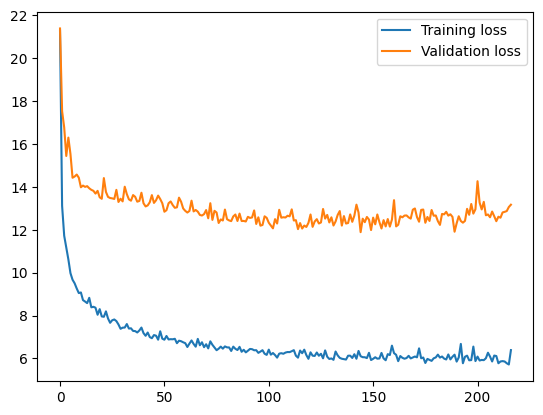

In [21]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


# Taking the most promissing values from the last loop

Testing with L2: 0.025, LR: 0.001, Patience: 72, Batch size: 16 -> V1
Testing with L2: 0.01, LR: 0.001, Patience: 72, Batch size: 16 -> V2

In [22]:
model3 = Sequential([
    Dense(512, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.15),
    Dense(256, activation='relu'),
    Dropout(0.38),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, min_lr=1e-6)



history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)

Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.0459 - mae: 3.2934 - mse: 26.1230 - val_loss: 22.8584 - val_mae: 2.7940 - val_mse: 20.6040
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.9500 - mae: 2.1037 - mse: 8.8909 - val_loss: 18.0242 - val_mae: 2.3657 - val_mse: 16.4483
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.7205 - mae: 1.9929 - mse: 8.2578 - val_loss: 16.1105 - val_mae: 2.1945 - val_mse: 14.9588
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.0843 - mae: 1.8932 - mse: 6.9975 - val_loss: 14.8709 - val_mae: 1.9332 - val_mse: 13.9361
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.3722 - mae: 1.8179 - mse: 6.4843 - val_loss: 15.1068 - val_mae: 2.0682 - val_mse: 14.3083
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.8395 - mae: 1.9488 - mse: 8.0573 - val_loss: 14.2951 - val_mae: 1.8962 - val_mse: 13.5922
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.9266 - mae: 1.

825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.2917 - mae: 2.8006 - mse: 19.2867 - val_loss: 14.9597 - val_mae: 3.0737 - val_mse: 14.1035 - learning_rate: 0.0010
Epoch 2/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5636 - mae: 2.0404 - mse: 7.8410 - val_loss: 8.2422 - val_mae: 2.1522 - val_mse: 7.8084 - learning_rate: 0.0010
Epoch 3/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0740 - mae: 2.0293 - mse: 8.6728 - val_loss: 10.2058 - val_mae: 2.4821 - val_mse: 9.9091 - learning_rate: 0.0010
Epoch 4/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0456 - mae: 1.8458 - mse: 6.7611 - val_loss: 11.5418 - val_mae: 2.6741 - val_mse: 11.2898 - learning_rate: 0.0010
Epoch 5/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2041 - mae: 1.7523 - mse: 5.9584 - val_loss: 14.2653 - val_mae: 3.0815 - val_mse: 14.0384 - learning_rate: 0.0010
Epoch 6/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5206 - mae: 1.6532 - mse: 5.2965 - val_loss: 15.4869 - val_mae: 3.1436 - val_mse: 15.2706 - learning_rate: 0.0010
Epoch 7/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2349 - mae: 1.7570 - mse: 6.0151 - val_loss: 13.7594 - val_mae: 2.9506 - val_mse: 13.5450 - learning_rate: 0.0010
Epoch 8/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7316 - mae: 1.6844 - mse: 5.5207 - val_loss: 19.9287 - val_mae: 3.6997 - val_mse: 19.7239 - learning_rate: 0.0010
Epoch 9/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5522 - mae: 1.6580 - mse: 5.3458 - val_loss: 26.9765 - val_mae: 4.3214 - val_mse: 26.7674 - learning_rate: 0.0010
Epoch 10/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5004 - mae: 1.6547 - mse: 5.2929 - val_loss: 16.9995 - val_mae: 3.3162 - val_mse: 16.7938 - learning_rate: 0.0010
Epoch 11/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6889 - mae: 1.6493 - mse: 5.4781 - val_loss: 17.6912 - val_mae: 3.4159 - val_mse: 17.4742 - learning_rate: 0.0010
Epoch 12/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4277 - mae: 1.6239 - mse: 5.2176 - val_loss: 18.3354 - val_mae: 3.4977 - val_mse: 18.1326 - learning_rate: 0.0010
Epoch 13/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9380 - mae: 1.5132 - mse: 4.7404 - val_loss: 19.3301 - val_mae: 3.6291 - val_mse: 19.1460 - learning_rate: 2.5000e-04
...
Epoch 17/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5297 - mae: 1.4443 - mse: 4.3617 - val_loss: 18.6069 - val_mae: 3.5405 - val_mse: 18.4405 - learning_rate: 2.5000e-04
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594]

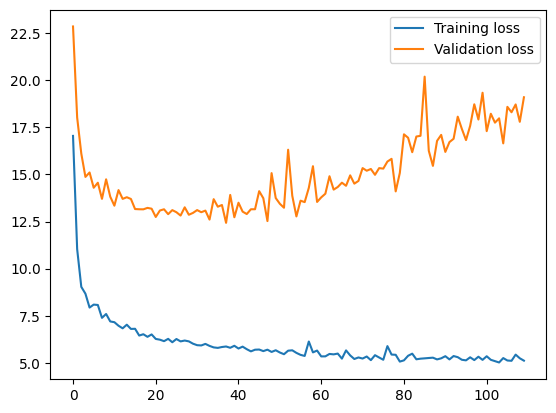

In [23]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


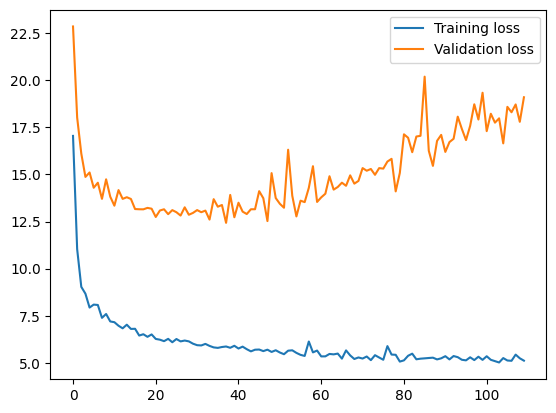

In [24]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [26]:
# Berechnen des Total MSE

from sklearn.metrics import mean_squared_error

# Vorhersagen für den gesamten Datensatz
y_pred = model.predict(X)

# MSE berechnen
total_mse = mean_squared_error(y, y_pred)
print(f"Gesamter MSE: {total_mse}")



y_pred = model2.predict(X)

# MSE berechnen
total_mse = mean_squared_error(y, y_pred)
print(f"Gesamter MSE: {total_mse}")


y_pred = model3.predict(X)

# MSE berechnen
total_mse = mean_squared_error(y, y_pred)
print(f"Gesamter MSE: {total_mse}")

768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
Gesamter MSE: 7.759484561869238
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
Gesamter MSE: 5.487086887248475
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
Gesamter MSE: 6.09485877993134


In [25]:



from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Beispiel: Zeitreihen-Daten
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Hyperparameter-Suchraum
l2_values = [0.01, 0.025, 0.05, 0.08]
learning_rates = [0.001, 0.002, 0.004, 0.006, 0.008]
patience_values = [72]
batch_sizes = [32, 16]

# Ergebnis speichern
best_params = None
best_loss = float("inf")

# Schleife über den Suchraum
for l2_value in l2_values:
    for lr in learning_rates:
        for patience in patience_values:
            for batch_size in batch_sizes:
                print(f"Testing with L2: {l2_value}, LR: {lr}, Patience: {patience}, Batch size: {batch_size}")
                
                # Cross-Validation
                fold_losses = []
                for train_index, val_index in tscv.split(X):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

                    # Modell definieren

                    model = Sequential([
                    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(l2_value)),
                    Dropout(0.25),
                    Dense(64, activation='relu'),
                    Dropout(0.3),
                    Dense(1, activation='linear'),
                    ])
                    # Optimizer und Kompilierung
                    optimizer = Adam(learning_rate=lr)
                    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

                    # Early Stopping Callback
                    early_stopping = EarlyStopping(patience=patience, restore_best_weights=True)

                    # Trainieren
                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=800,
                        batch_size=batch_size,
                        callbacks=[early_stopping],
                        verbose=0
                    )

                    # Validierungsergebnis
                    val_loss = model.evaluate(X_val, y_val, verbose=0)[0]
                    fold_losses.append(val_loss)

                # Durchschnittlicher Loss für alle Folds
                mean_loss = np.mean(fold_losses)
                print(f"Mean Validation Loss: {mean_loss}")

                # Beste Hyperparameter speichern
                if mean_loss < best_loss:
                    best_loss = mean_loss
                    best_params = {
                        'l2': l2_value,
                        'learning_rate': lr,
                        'patience': patience,
                        'batch_size': batch_size
                    }

# Ergebnisse
print("Best Hyperparameters:")
print(best_params)
print(f"Best Loss: {best_loss}")

# Trainieren mit den besten Hyperparametern auf Train+Validation und Test auf Testdaten
final_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(best_params['l2'])),
    Dropout(0.15),
    Dense(256, activation='relu'),
    Dropout(0.38),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

final_optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=final_optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
final_early_stopping = EarlyStopping(patience=best_params['patience'], restore_best_weights=True)

final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=800,
    batch_size=best_params['batch_size'],
    callbacks=[final_early_stopping],
    verbose=1
)

# Testdaten auswerten
test_loss = final_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss[0]}, Test MAE: {test_loss[1]}, Test MSE: {test_loss[2]}")

# stopped at an hour running time, nice in theory, but we don't have the computing power to run this efficiently

Testing with L2: 0.01, LR: 0.001, Patience: 72, Batch size: 32


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 